In [ ]:
# Web Scraper 
### @Author : Woojin Park, Nidhi Bhaskar
### @Copyright : 2020, Neolth NSF grant NLP project 
### @Email : woojinpa@andrew.cmu.edu , nidhibha@andrew.cmu.edu
### @Status : Production

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import requests
import json
import re
import time

In [2]:
#SuicideWatch : https://www.reddit.com/r/SuicideWatch/
#subreddit = reddit.subreddit('SuicideWatch')

In [3]:
##Build a Time Conversion function  :From Utc

In [4]:
def dateConvert(year,month,day) :
    day = dt.date(year,month,day)
    return int(day.strftime("%s"))

In [5]:
dateConvert(2020,1,22)

1579669200

In [6]:
dateConvert(2020,5,22)

1590120000

In [7]:
print(dt.datetime.fromtimestamp(1579669200))
print(dt.datetime.fromtimestamp(1590120000))

2020-01-22 00:00:00
2020-05-22 00:00:00


In [8]:
## Put the URL of Pushshift api
pushshift_reddit = "http://api.pushshift.io/reddit"

In [9]:
def fetchObjects(**kwargs):
    # Default paramaters for API query : will be used to requests.get(), for GET-style URL parameters
    params = {
        "sort_type":"created_utc",
        "sort":"asc",
        "size":1000, ##maximum size api can return
        "before" : dateConvert(2020,5,22) 
        }

    # Add additional paramters based on function arguments
    for key,value in kwargs.items():
        params[key] = value

    # Print API query paramaters
    print(params)

    # Set the type variable based on function input
    # The type can be "comment" or "submission", default is "comment"
    type = "comment"
    
    if 'type' in kwargs and kwargs['type'].lower() == "submission":
        type = "submission"
    
    # Perform an API request
    r = requests.get(pushshift_reddit + "/" + type + "/search/", params=params, timeout=30)

    # Check the status code successful or not
    if r.status_code == 200: #  200 means : http server response successfully 
        response = json.loads(r.text)
        data = response['data']
        sorted_data_by_id = sorted(data, key=lambda x: int(x['id'],36))
        
        return sorted_data_by_id

In [ ]:
def extract_reddit_data(**kwargs):
    # Speficify the start timestamp
    max_created_utc = dateConvert(2020,1,22) 
    max_id = 0
    print("Scrap subreddit data from", dt.datetime.fromtimestamp(dateConvert(2020,1,22))," to ", \
                              dt.datetime.fromtimestamp(dateConvert(2020,5,22))) 
    # Open a file for JSON output
    file = open("submissions_SuicideWatch.json","a")

    # While loop for recursive function
    while 1:
        nothing_processed = True
        # Call the recursive function
        objects = fetchObjects(**kwargs, after=max_created_utc)
        
        # Loop the returned data, ordered by date
        for object in objects:
            id = int(object['id'],36)
            if id > max_id:
                nothing_processed = False
                created_utc = object['created_utc']
                max_id = id
                if created_utc > max_created_utc: max_created_utc = created_utc
                # Output JSON data to the opened file
                print(json.dumps(object,sort_keys=True, ensure_ascii=True),file=file)
        
        # Exit if nothing happened
        if nothing_processed: return
        max_created_utc -= 1

        # Sleep a little before the next recursive function call
        time.sleep(.5)
    
# Start program by calling function with:
# 1) Subreddit specified
# 2) The type of data required (comment or submission)
extract_reddit_data(subreddit="SuicideWatch", type="submission")

Scrap subreddit data from 2020-01-22 00:00:00  to  2020-05-22 00:00:00
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'SuicideWatch', 'type': 'submission', 'after': 1579669200}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'SuicideWatch', 'type': 'submission', 'after': 1579956526}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'SuicideWatch', 'type': 'submission', 'after': 1580189306}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'SuicideWatch', 'type': 'submission', 'after': 1580431925}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'SuicideWatch', 'type': 'submission', 'after': 1580683816}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'SuicideWatch', 'type': 'submission', 'after': 1580883330}
{'sort_type': 'cr

In [3]:
from pprint import pprint

with open('submissions_SuicideWatch.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")



In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
data =pd.DataFrame(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47795 entries, 0 to 47794
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  47795 non-null  object 
 1   allow_live_comments            47795 non-null  bool   
 2   author                         47795 non-null  object 
 3   author_flair_css_class         16980 non-null  object 
 4   author_flair_richtext          46884 non-null  object 
 5   author_flair_text              0 non-null      object 
 6   author_flair_type              46884 non-null  object 
 7   author_fullname                46884 non-null  object 
 8   author_patreon_flair           46884 non-null  object 
 9   author_premium                 46884 non-null  object 
 10  awarders                       47795 non-null  object 
 11  can_mod_post                   47795 non-null  bool   
 12  contest_mode                   47795 non-null 

In [6]:
data.head(2)

all_awardings  allow_live_comments           author author_flair_css_class  \
0            []                False    DespressoCafe                   None   
1            []                False  LifeisCrumbling                 modmsg   

  author_flair_richtext author_flair_text author_flair_type author_fullname  \
0                    []              None              text     t2_3bth5k87   
1                    []              None              text     t2_4jrkmlsu   

  author_patreon_flair author_premium awarders  can_mod_post  contest_mode  \
0                False          False       []         False         False   
1                False          False       []         False         False   

   created_utc             domain  \
0   1579669252  self.SuicideWatch   
1   1579669256  self.SuicideWatch   

                                           full_link gildings      id  \
0  https://www.reddit.com/r/SuicideWatch/comments...       {}  es76b4   
1  https://www.reddit.com/r/SuicideWatch/comments...       {}  es76bt   

   is_crosspostable  is_meta  is_original_content  is_reddit_media_domain  \
0             False    False                False                   False   
1             False    False                False                   False   

   is_robot_indexable  is_self  is_video link_flair_background_color  \
0                True     True     False                               
1                True     True     False                               

  link_flair_richtext link_flair_text_color link_flair_type  locked  \
0                  []                  dark            text   False   
1                  []                  dark            text   False   

   media_only  no_follow  num_comments  num_crossposts  over_18  \
0       False       True             5               0    False   
1       False       True             1               0    False   

  parent_whitelist_status                                          permalink  \
0                  no_ads  /r/SuicideWatch/comments/es76b4/i_dont_know_wh...   
1                  no_ads  /r/SuicideWatch/comments/es76bt/im_having_an_e...   

   pinned  pwls  retrieved_on  score  \
0   False   0.0    1579669254      1   
1   False   0.0    1579669257      1   

                                            selftext  send_replies  spoiler  \
0  Let's make it quick. I'm almost 20. I've been ...          True    False   
1  If I only helped people either as a defense me...          True    False   

   stickied     subreddit subreddit_id  subreddit_subscribers subreddit_type  \
0     False  SuicideWatch     t5_2qpzs                 178202         public   
1     False  SuicideWatch     t5_2qpzs                 178202         public   

  thumbnail                                              title  \
0      self  I don't know where to go or what to do. I can'...   
1      self                   I'm having an existencial crisis   

   total_awards_received                                                url  \
0                      0  https://www.reddit.com/r/SuicideWatch/comments...   
1                      0  https://www.reddit.com/r/SuicideWatch/comments...   

  whitelist_status  wls              author_flair_template_id  \
0           no_ads  0.0                                   NaN   
1           no_ads  0.0  2a7b5518-8e45-11e5-a506-0ed10b342609   

  author_flair_text_color author_flair_background_color removed_by_category  \
0                     NaN                           NaN                 NaN   
1                    dark                           NaN                 NaN   

  author_cakeday post_hint preview  edited banned_by treatment_tags  gilded  \
0            NaN       NaN     NaN     NaN       NaN            NaN     NaN   
1            NaN       NaN     NaN     NaN       NaN            NaN     NaN   

   upvote_ratio  
0           NaN  
1           NaN

In [7]:
reddit_data = data[['author','over_18','title','selftext','num_comments', 'score', 'full_link','created_utc']]

In [8]:
reddit_data.isnull().sum()

author           0
over_18          0
title            0
selftext        94
num_comments     0
score            0
full_link        0
created_utc      0
dtype: int64

In [9]:
reddit_data = reddit_data.dropna()
reddit_data.isnull().sum()

author          0
over_18         0
title           0
selftext        0
num_comments    0
score           0
full_link       0
created_utc     0
dtype: int64

In [10]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47701 entries, 0 to 47794
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        47701 non-null  object
 1   over_18       47701 non-null  bool  
 2   title         47701 non-null  object
 3   selftext      47701 non-null  object
 4   num_comments  47701 non-null  int64 
 5   score         47701 non-null  int64 
 6   full_link     47701 non-null  object
 7   created_utc   47701 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 3.0+ MB


In [11]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = reddit_data["created_utc"].apply(get_date)
reddit_data = reddit_data.assign(timestamp = _timestamp)

In [12]:
reddit_data.head(5)

author  over_18  \
0    DespressoCafe    False   
1  LifeisCrumbling    False   
2  Throwoutawaynow    False   
3    forestgreen19    False   
4       Expert-Egg    False   

                                               title  \
0  I don't know where to go or what to do. I can'...   
1                   I'm having an existencial crisis   
2           Everything looms massive and cuts deeper   
3            overcoming this is hard and complicated   
4                                        I need help   

                                            selftext  num_comments  score  \
0  Let's make it quick. I'm almost 20. I've been ...             5      1   
1  If I only helped people either as a defense me...             1      1   
2  I don’t have a bad life at all, I’m pretty fuc...             1      1   
3  I don’t want to be depressed, I don’t think an...             1      1   
4  I’m only 21 and have had 3 partners. My second...             4      1   

                                           full_link  created_utc  \
0  https://www.reddit.com/r/SuicideWatch/comments...   1579669252   
1  https://www.reddit.com/r/SuicideWatch/comments...   1579669256   
2  https://www.reddit.com/r/SuicideWatch/comments...   1579669493   
3  https://www.reddit.com/r/SuicideWatch/comments...   1579669566   
4  https://www.reddit.com/r/SuicideWatch/comments...   1579669671   

            timestamp  
0 2020-01-22 00:00:52  
1 2020-01-22 00:00:56  
2 2020-01-22 00:04:53  
3 2020-01-22 00:06:06  
4 2020-01-22 00:07:51

In [13]:
reddit_data.describe(include ='all').transpose()

count unique                                                top  \
author        47701  28930                                          [deleted]   
over_18       47701      2                                              False   
title         47701  42166                                               Help   
selftext      47701  41666                                                      
num_comments  47701    NaN                                                NaN   
score         47701    NaN                                                NaN   
full_link     47701  47701  https://www.reddit.com/r/SuicideWatch/comments...   
created_utc   47701    NaN                                                NaN   
timestamp     47701  47537                                2020-02-01 17:30:55   

               freq               first                last         mean  \
author          817                 NaT                 NaT          NaN   
over_18       47497                 NaT                 NaT          NaN   
title           127                 NaT                 NaT          NaN   
selftext       2855                 NaT                 NaT          NaN   
num_comments    NaN                 NaT                 NaT      4.29939   
score           NaN                 NaT                 NaT       1.3802   
full_link         1                 NaT                 NaT          NaN   
created_utc     NaN                 NaT                 NaT  1.58506e+09   
timestamp         3 2020-01-22 00:00:52 2020-05-21 23:59:35          NaN   

                      std          min          25%          50%          75%  \
author                NaN          NaN          NaN          NaN          NaN   
over_18               NaN          NaN          NaN          NaN          NaN   
title                 NaN          NaN          NaN          NaN          NaN   
selftext              NaN          NaN          NaN          NaN          NaN   
num_comments       9.6745            0            1            2            4   
score             9.53552            0            1            1            1   
full_link             NaN          NaN          NaN          NaN          NaN   
created_utc   3.03158e+06  1.57967e+09  1.58247e+09  1.58512e+09  1.58777e+09   
timestamp             NaN          NaN          NaN          NaN          NaN   

                      max  
author                NaN  
over_18               NaN  
title                 NaN  
selftext              NaN  
num_comments          372  
score                 821  
full_link             NaN  
created_utc   1.59012e+09  
timestamp             NaN

In [14]:
reddit_data['over_18'] = reddit_data['over_18'].astype('str')

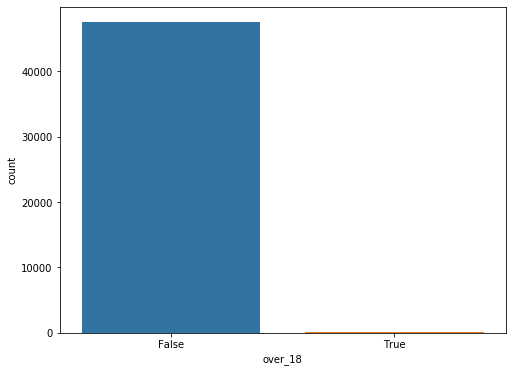

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='over_18', data =reddit_data)

In [16]:
count_df = reddit_data.groupby(by=['score']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0      1     2    3    4    5   6   7   8   9  10  11  12  \
score              0      1     2    3    4    5   6   7   8   9  10  11  12   
number of users  275  43662  2028  829  296  178  86  65  40  33  21  23   8   

                 13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  \
score            13  14  15  16  17  18  19  20  21  22  23  24  25  26  27   
number of users  12  13   9  11  10   4   8   4   4   2   3   4   3   4   4   

                 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  \
score            28  29  30  34  35  37  39  40  41  42  43  44  45  47  48   
number of users   2   1   5   3   1   1   1   1   2   1   1   1   2   1   2   

                 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  \
score            52  53  56  59  62  63  66  70  71  77  80  84  92  93  95   
number of users   1   2   1   2   1   1   1   1   2   1   1   1   1   1   1   

                  58   59   60   61   62   63   64   65   66   67   68   69  \
score            102  105  106  112  118  136  151  210  424  431  443  482   
number of users    1    1    1    1    1    1    1    1    1    1    1    1   

                  70   71   72   73   74   75   76  
score            521  543  588  710  717  800  821  
number of users    1    1    1    1    1    1    1

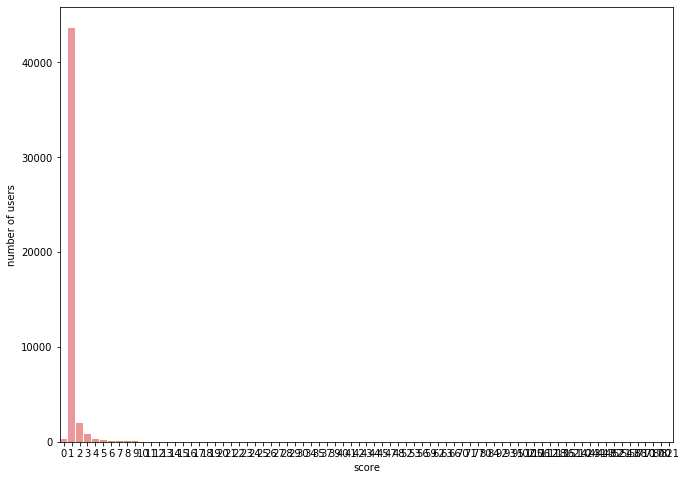

In [17]:
plt.figure(figsize=(11,8))
sns.barplot(x= 'score', y= 'number of users', data =count_df)

In [18]:
count_df = reddit_data.groupby(by=['num_comments']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0      1     2     3     4     5     6     7     8    9  \
num_comments        0      1     2     3     4     5     6     7     8    9   
number of users  8508  11898  7449  4759  3247  2327  1719  1256  1022  780   

                  10   11   12   13   14   15   16   17   18   19   20  21  \
num_comments      10   11   12   13   14   15   16   17   18   19   20  21   
number of users  661  523  438  341  299  236  224  219  158  136  112  83   

                  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  \
num_comments      22  23  24  25  26  27  28  29  30  31  32  33  34  35  36   
number of users  109  86  75  62  52  63  55  57  30  46  36  35  31  24  22   

                 37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
num_comments     37  38  39  40  41  42  43  44  45  46  47  48  49  50  51   
number of users  21  16  19  18  16  17  19  17  13  22   9  11   9   9  10   

                 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  \
num_comments     52  53  54  55  56  57  58  59  60  61  62  63  64  65  66   
number of users   6   5   8  11   9   9  11   4   9   7   4   2   5   3   4   

                 67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  \
num_comments     67  68  69  70  71  72  73  74  75  76  77  78  79  80  81   
number of users   5   8   6   5   7   5   6   1   2   3   7   2   4   6   3   

                 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  \
num_comments     82  83  84  86  87  88  89  90  91  92  93  94  95  96  98   
number of users   4   2   3   5   5   2   1   4   4   3   7   1   2   5   1   

                 97   98   99  100  101  102  103  104  105  106  107  108  \
num_comments     99  100  101  102  104  105  106  107  111  112  113  114   
number of users   2    3    4    2    1    1    2    1    1    1    3    1   

                 109  110  111  112  113  114  115  116  117  118  119  120  \
num_comments     121  122  128  129  130  132  138  139  141  142  143  144   
number of users    2    2    1    1    1    2    1    1    2    4    2    1   

                 121  122  123  124  125  126  127  128  129  130  131  132  \
num_comments     147  148  149  150  151  152  154  157  158  159  162  163   
number of users    1    1    1    1    1    2    1    1    1    1    1    1   

                 133  134  135  136  137  138  139  140  141  142  143  144  \
num_comments     164  168  170  172  173  175  177  178  186  195  199  207   
number of users    3    1    1    1    1    2    2    1    1    1    1    1   

                 145  146  147  148  149  150  151  152  153  
num_comments     209  215  218  219  230  274  300  336  372  
number of users    2    1    1    1    1    1    1    1    1

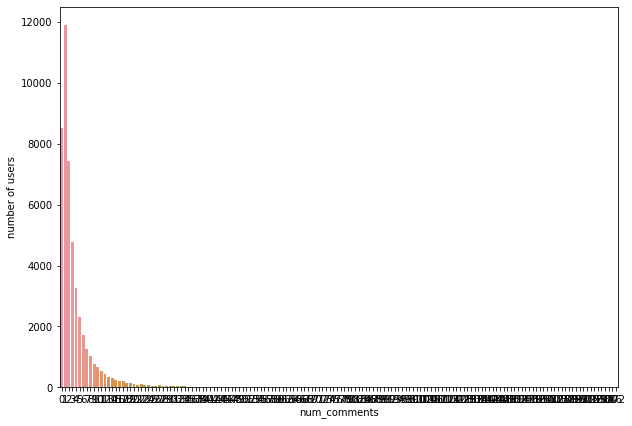

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'num_comments', y= 'number of users', data =count_df)

In [20]:
reddit_data['selftext'].tail(3).to_list()

['I was thinking about taking the sleeping pills I have here. A few boxes worth, I can get my amount in a sec. Assuming I survive, what damage would be done?',
 'Why can’t I bring myself to do it? I’ve convinced myself to end it all, but I can’t. I want to but I can’t.',
 'How likely is it that one would die from hanging?']

In [21]:
reddit_data.tail(3)

author over_18  \
47792     helpmeplease2023   False   
47793          RealRoboMan   False   
47794  stressedoptimist001   False   

                                                   title  \
47792  If I take these pills, what are the repercussi...   
47793                                  Why can’t I do it   
47794                       Is it hard to hang yourself?   

                                                selftext  num_comments  score  \
47792  I was thinking about taking the sleeping pills...            12      1   
47793  Why can’t I bring myself to do it? I’ve convin...             2      0   
47794  How likely is it that one would die from hanging?            18      1   

                                               full_link  created_utc  \
47792  https://www.reddit.com/r/SuicideWatch/comments...   1590119224   
47793  https://www.reddit.com/r/SuicideWatch/comments...   1590119412   
47794  https://www.reddit.com/r/SuicideWatch/comments...   1590119975   

                timestamp  
47792 2020-05-21 23:47:04  
47793 2020-05-21 23:50:12  
47794 2020-05-21 23:59:35

In [22]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47701 entries, 0 to 47794
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   author        47701 non-null  object        
 1   over_18       47701 non-null  object        
 2   title         47701 non-null  object        
 3   selftext      47701 non-null  object        
 4   num_comments  47701 non-null  int64         
 5   score         47701 non-null  int64         
 6   full_link     47701 non-null  object        
 7   created_utc   47701 non-null  int64         
 8   timestamp     47701 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 4.9+ MB


In [23]:
reddit_data[reddit_data['selftext'].str.contains("suicide") == True].count()

author          6901
over_18         6901
title           6901
selftext        6901
num_comments    6901
score           6901
full_link       6901
created_utc     6901
timestamp       6901
dtype: int64

In [24]:
reddit_data[reddit_data['selftext'].str.contains("suicide") == True]['selftext'].head(1).to_list()

['I was about to have killed myself when my phone rang, it was a friend of mine, and she saw what I was going to do via all the tears I was shedding, yet she helped me, and even told me about this place, thank you all, mods, posters and even some lurkers, for helping me, goodbye for now at least and remember, even someone about to commit suicide can come back.\n\nI thank you all from the bottom of my heart.']

In [25]:
reddit_data[reddit_data['selftext'].str.contains("suicidal") == True].count()

author          4968
over_18         4968
title           4968
selftext        4968
num_comments    4968
score           4968
full_link       4968
created_utc     4968
timestamp       4968
dtype: int64

In [26]:
reddit_data[reddit_data['selftext'].str.contains("suicidal") == True]['selftext'].tail(1).to_list()

['Look, I’m a dude coming like everyone else here just trying to find a way to think differently . \n\nHow long have i been suicidal? Depends. When i was in 6th grade my dad died from lymphoma cancer and that was very... strange. I was the only one telling my whole family to cheer up. \n\nNeedless to say, my mother got into drugs, living on the streets as on of those you would call “dope heads” (god i hate saying this) now she’s back and she’s doing better but you can tell it’s affected her and there’s times we’re she’s just not herself. I take real xanny bars on the daily and they’re getting expensive and I’m currently tapering off safely but . I just feel like life’s going no where. I sit in my room watch stuff and just dream of being there or havi that feeeling. About 6 years ago i had a job making 800 a week at 19 years old but it was dangerous and i was with a girl who was beautiful but we both were just getting Into our first relation ship and well at first it’s so fucking beauti